In [ ]:
import os
import numpy as np
import pandas as pd
import arviz as az
import pymc3 as pm
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
rng = np.random.default_rng(0)
az.style.use("arviz-darkgrid")
%matplotlib inline

### 1. Get SP500 data

In [ ]:
# !pip install pandas_datareader

In [ ]:
import pandas_datareader.data as web
import datetime

In [ ]:
start = datetime.datetime(2000, 1, 1)
end = datetime.date.today()

sp500 = web.DataReader(['sp500'], 'fred', start, end)

In [ ]:
sp500.shape

(2609, 1)

In [ ]:
sp500.head()

,sp500,change
DATE,,
2012-02-10,1342.64,-0.006910
2012-02-13,1351.77,0.006777
2012-02-14,1350.50,-0.000940
2012-02-15,1343.23,-0.005398
2012-02-16,1358.04,0.010965


In [ ]:
sp500["change"] = np.log(sp500["sp500"]).diff()

In [ ]:
sp500.isna().sum()

sp500      92
change    184
dtype: int64

In [ ]:
sp500 = sp500.dropna()

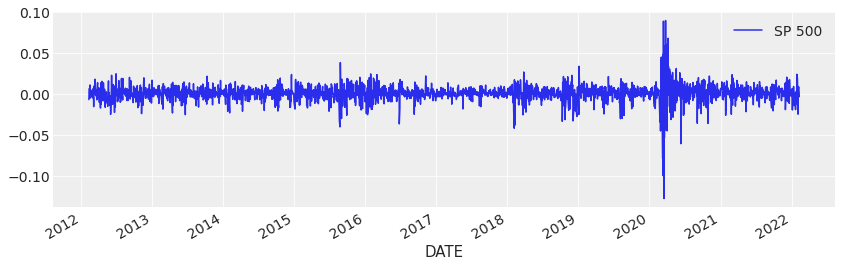

In [ ]:
# Plot data
fig, ax = plt.subplots(figsize=(14,4))
sp500.plot(y="change", label="SP 500", ax=ax);

### Model

In [ ]:
with pm.Model(coords={"time": data.index.values}) as model:
    